# Logistic Regression

In [20]:
import pandas as pd
import numpy as np

In [21]:
tech_list = ['SMA','EMA','STOCH_k','STOCK_d','RSI','MFI','SAR','AD','MACD','MACD_Signal','MACD_Histo','VWAP','SPY','NDAQ','PC1','PC2']
funda_list = ['pcf','PEG_trailing','dpr','npm','gpm','roa','roe','capital_ratio','de_ratio','cash_ratio','curr_ratio','inv_turn','pay_turn','sale_nwc','rd_sale','accrual']
macro_list = ['gdpr1,gdpr2,cpi,bond20yr,bond30yr,fedfunds,cpir,wpir,unemp,employ']

## Taking the AAPL for example to investigate the effect

In [22]:
freq = 'Daily'
stock = 'AAPL'
price = pd.read_csv('../encode_price/'+freq+'/'+stock+'.csv')
price = price.loc[price.Date<'2019-12-31',:]
y = price.direction.shift(-1).values[::-1]
predictors = pd.read_csv('../predictors/Tech/'+freq+'/'+stock+'.csv')
NLP = pd.read_csv('../predictors/NLP/Daily/NYT_macro_SA.csv')
predictors = pd.merge(predictors,NLP,how='left',on=['Date'])
predictors = predictors.loc[predictors.Date < '2019-12-31',:]
predictors.set_index('Date',inplace=True)
predictors.fillna(0,inplace=True)
X = predictors.values[:-1,]

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,zero_one_loss,recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,shuffle=False)


## SMOTE Balanced Dataset

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increas

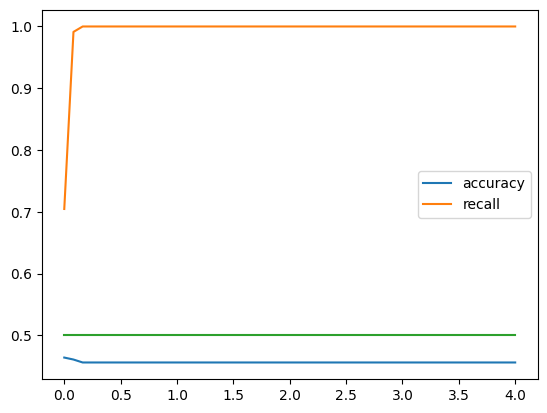

In [18]:
result1 = []
result2 = []
n = 4
for i in np.linspace(0.0000001,n,50):
    sm = SMOTE(sampling_strategy='minority',random_state=42,k_neighbors=5)
    X_res,y_res = sm.fit_resample(X_train,y_train)
    pipe = make_pipeline(MinMaxScaler(),LogisticRegression(C=i,dual = True,penalty = 'l2',solver='liblinear'))
    pipe.fit(X_res,y_res)
    y_pred = pipe.predict(X_test)
    # print(classification_report(y_test,y_pred))
    accuracy = zero_one_loss(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    result1.append(accuracy)
    result2.append(recall)

plt.plot(np.linspace(0.0000001,n,50),result1,label = 'accuracy')
plt.plot(np.linspace(0.0000001,n,50),result2,label = 'recall')
plt.legend()
plt.plot(np.linspace(0.0000001,n,50),[0.5]*(50))
plt.show()

## Original Dataset

In [19]:
pipe = make_pipeline(MinMaxScaler(),LogisticRegression(dual=True,penalty = 'l2',solver='liblinear'))
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       287
         1.0       0.54      1.00      0.70       342

    accuracy                           0.54       629
   macro avg       0.27      0.50      0.35       629
weighted avg       0.30      0.54      0.38       629



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.